In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [38]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [40]:
data['housing_median_age']

0        41
1        21
2        52
3        52
4        52
         ..
20635    25
20636    18
20637    17
20638    18
20639    16
Name: housing_median_age, Length: 20640, dtype: int64

In [41]:
data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [42]:
data['ocean_proximity'].nunique()

5

In [43]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [44]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [45]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

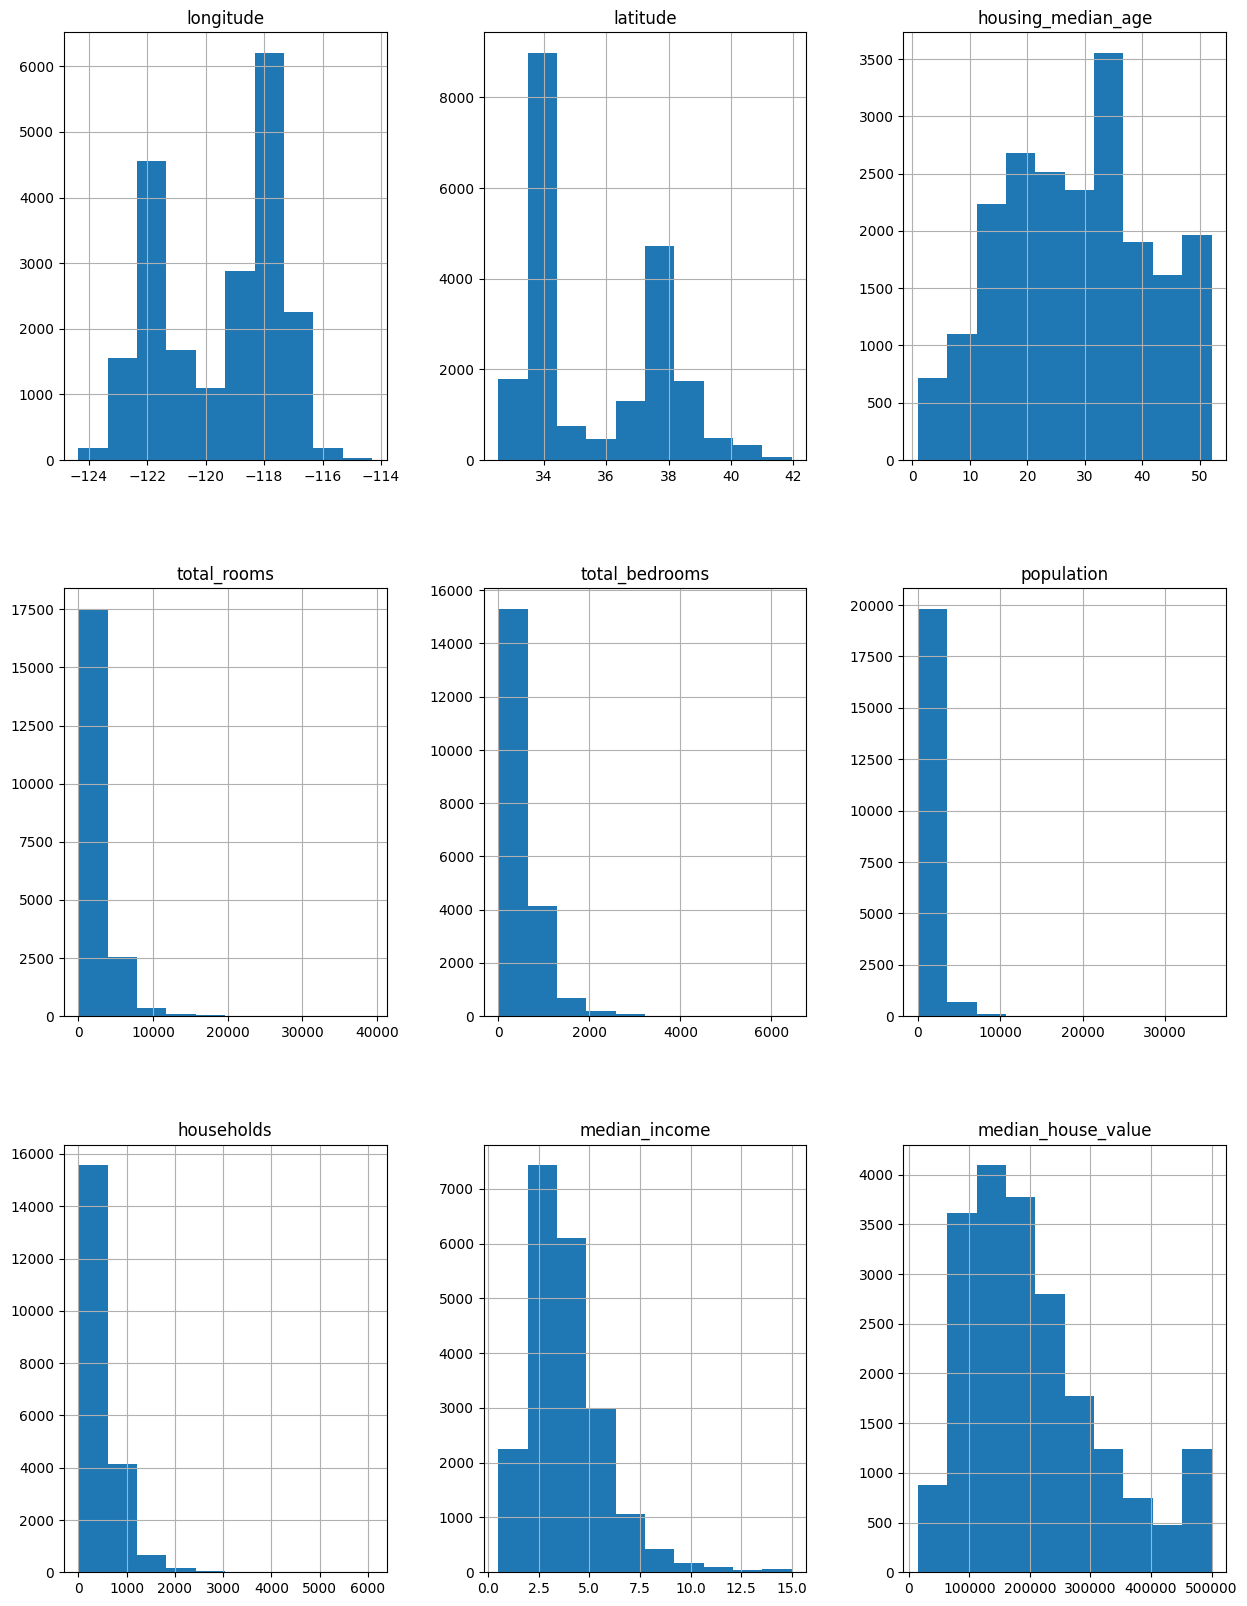

In [46]:
data.hist(bins=10, figsize=(15,20))

data.iloc[:,:-1].corr()

In [47]:
data.iloc[:,:-1].corr()['median_income']

longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
total_rooms           0.198050
total_bedrooms       -0.007723
population            0.004834
households            0.013033
median_income         1.000000
median_house_value    0.688075
Name: median_income, dtype: float64

# Categorizing a numerical attribute for Stratified Splitting

In [48]:
data['median_income'].head(10)

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
5    4.0368
6    3.6591
7    3.1200
8    2.0804
9    3.6912
Name: median_income, dtype: float64

In [49]:
data['median_income'].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

<Axes: >

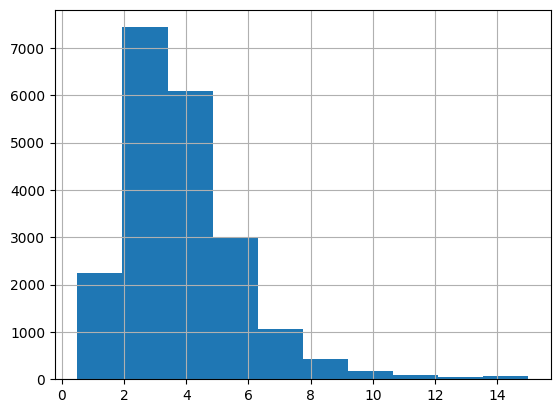

In [50]:
data['median_income'].hist()

In [51]:
data['median_income'].min()

0.4999

In [52]:
data['median_income'].max()

15.0001

In [53]:
data['income_category'] = pd.cut(data['median_income'], bins=[0,2,3,4.5,6.2,11,np.inf], labels=[1,2,3,4,5,6])
data['income_category'].head(10)

0    5
1    5
2    5
3    4
4    3
5    3
6    3
7    3
8    2
9    3
Name: income_category, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [54]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3


In [55]:
data['income_category'].nunique()

6

In [56]:
data['income_category'].value_counts()

income_category
3    7236
2    4946
4    3992
1    2457
5    1851
6     158
Name: count, dtype: int64

<Axes: xlabel='income_category'>

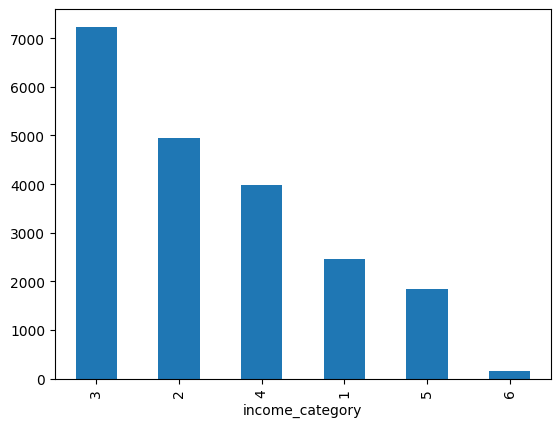

In [57]:
data['income_category'].value_counts().plot.bar()

In [58]:
data['income_category'].value_counts(normalize=True)

income_category
3    0.350581
2    0.239632
4    0.193411
1    0.119041
5    0.089680
6    0.007655
Name: proportion, dtype: float64

# Train-Test Split

In [59]:
indices = np.random.permutation(len(data))

In [60]:
len(indices)

20640

In [61]:
train = round(len(indices)*0.8)

In [62]:
test = round(len(indices)*0.2)

In [63]:
data.iloc[indices[:train]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
20512,-121.55,38.59,36,435,95.0,285,90,1.2292,69600,INLAND,1
15568,-117.04,33.09,16,4677,581.0,1902,566,6.1834,335600,<1H OCEAN,4
4047,-118.51,34.14,28,6748,904.0,2431,876,12.8879,500001,<1H OCEAN,6
18127,-122.02,37.34,30,1036,151.0,467,156,6.4480,360600,<1H OCEAN,5
3548,-118.61,34.25,16,8295,1506.0,3903,1451,5.5111,276600,<1H OCEAN,4
...,...,...,...,...,...,...,...,...,...,...,...
10273,-117.86,33.87,19,1591,279.0,891,237,5.6573,216000,<1H OCEAN,4
20054,-119.30,35.87,20,1934,377.0,1341,336,2.1434,62600,INLAND,2
9053,-118.12,34.70,7,4915,885.0,2833,874,4.3229,130000,INLAND,3
13215,-117.72,34.02,17,1781,262.0,860,256,6.5958,236800,INLAND,5


In [64]:
data.iloc[indices[train:]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17157,-122.21,37.43,20,975,134.0,324,146,9.7796,500001,NEAR OCEAN,5
714,-122.09,37.68,41,1382,353.0,704,314,3.5114,197500,NEAR BAY,3
12295,-116.89,33.93,29,4549,916.0,2494,912,2.0976,72600,INLAND,2
18279,-122.08,37.35,35,1347,207.0,548,189,7.7068,500001,NEAR BAY,5
9811,-121.94,36.57,28,3153,409.0,569,271,14.4113,500001,NEAR OCEAN,6
...,...,...,...,...,...,...,...,...,...,...,...
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN,5
123,-122.24,37.84,52,3529,574.0,1177,555,5.1773,389500,NEAR BAY,4
17789,-121.83,37.35,31,2914,715.0,3547,645,3.7143,178600,<1H OCEAN,3
18814,-121.45,41.04,33,2029,378.0,936,343,2.6700,77500,INLAND,2


In [79]:
def my_train_test_split(data, ratio, seed):

    np.random.seed(seed)

    shuffled_indices = np.random.permutation(len(data))

    train_ratio = round(len(shuffled_indices)*ratio)

    train_data = data.iloc[shuffled_indices[:train_ratio]]
    test_data = data.iloc[shuffled_indices[train_ratio:]]

    return train_data, test_data

In [80]:
train_data, test_data = my_train_test_split(data, 0.8, 42)

In [81]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
9221,-120.26,37.13,33,1239,250.0,648,227,2.0278,58800,INLAND,2
10234,-117.91,33.86,26,2296,570.0,1415,527,2.4732,165800,<1H OCEAN,2
4763,-118.36,34.04,48,1769,429.0,993,405,2.3214,139400,<1H OCEAN,2
9062,-118.15,34.69,32,1300,234.0,712,249,3.2500,107500,INLAND,3
1874,-119.97,38.93,24,856,185.0,388,108,3.1806,107200,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35,1330,201.0,658,217,6.3700,229200,<1H OCEAN,5
11964,-117.43,34.02,33,3084,570.0,1753,449,3.0500,97800,INLAND,3
5390,-118.38,34.03,36,2101,569.0,1756,527,2.9344,222100,<1H OCEAN,2
860,-121.96,37.58,15,3575,597.0,1777,559,5.7192,283500,<1H OCEAN,4


# Stratified Splitting using sklearn

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffled_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [83]:
genObj = shuffled_data.split(data, data['income_category'])

In [84]:
IndexList = next(genObj)

In [85]:
len(IndexList[0])

16512

In [86]:
len(IndexList[1])

4128

In [87]:
strat_train_data = data.iloc[IndexList[0]]

In [88]:
strat_test_data = data.iloc[IndexList[1]]
strat_test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17428,-120.47,34.65,16,2549,428.0,1486,432,4.2875,150700,NEAR OCEAN,3
15123,-116.94,32.83,38,1701,317.0,872,304,3.7831,147800,<1H OCEAN,3
14508,-117.20,32.86,4,4308,1095.0,1923,932,3.9356,267000,NEAR OCEAN,3
12599,-121.49,38.53,42,1468,281.0,571,271,3.3906,124200,INLAND,3
9001,-118.34,33.99,47,1107,199.0,437,178,3.7344,179400,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
16420,-121.29,37.89,26,161,27.0,1542,30,5.7485,162500,INLAND,4
12195,-117.28,33.66,15,4573,928.0,2513,832,2.6949,163600,<1H OCEAN,2
10778,-117.90,33.65,30,1634,373.0,771,364,3.4125,284100,<1H OCEAN,3
9836,-121.89,36.63,20,1834,554.0,971,514,3.0383,217300,<1H OCEAN,3


In [89]:
strat_test_data.shape 

(4128, 11)

In [90]:
strat_train_data['income_category'].value_counts()/len(strat_train_data)

income_category
3    0.350594
2    0.239644
4    0.193435
1    0.119004
5    0.089692
6    0.007631
Name: count, dtype: float64

In [91]:
strat_train_data['income_category'].value_counts(normalize = True)

income_category
3    0.350594
2    0.239644
4    0.193435
1    0.119004
5    0.089692
6    0.007631
Name: proportion, dtype: float64

In [92]:
strat_test_data['income_category'].value_counts(normalize=True)

income_category
3    0.350533
2    0.239583
4    0.193314
1    0.119186
5    0.089632
6    0.007752
Name: proportion, dtype: float64

# Preparing Test Data

# Step-1: Handling Categorical Data

# One Hot Encoding

In [93]:
categorical_df = strat_test_data['ocean_proximity']

In [94]:
arr = np.array(categorical_df)

In [95]:
test_data_cat = arr.reshape(-1,1)

In [96]:
from sklearn.preprocessing import OneHotEncoder
category_encoder = OneHotEncoder()
test_encoder = category_encoder.fit_transform(test_data_cat)

In [97]:
test_encoder

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [108]:
test_encoder.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [109]:
category_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [110]:
strat_test_data[category_encoder.categories_[0]] = test_encoder.toarray()
strat_test_data

C:\Users\macready\AppData\Local\Temp\ipykernel_9464\2209307890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_data[category_encoder.categories_[0]] = test_encoder.toarray()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17428,-120.47,34.65,16,2549,428.0,1486,432,4.2875,150700,0.0,0.0,0.0,0.0,1.0
15123,-116.94,32.83,38,1701,317.0,872,304,3.7831,147800,1.0,0.0,0.0,0.0,0.0
14508,-117.20,32.86,4,4308,1095.0,1923,932,3.9356,267000,0.0,0.0,0.0,0.0,1.0
12599,-121.49,38.53,42,1468,281.0,571,271,3.3906,124200,0.0,1.0,0.0,0.0,0.0
9001,-118.34,33.99,47,1107,199.0,437,178,3.7344,179400,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,-121.29,37.89,26,161,27.0,1542,30,5.7485,162500,0.0,1.0,0.0,0.0,0.0
12195,-117.28,33.66,15,4573,928.0,2513,832,2.6949,163600,1.0,0.0,0.0,0.0,0.0
10778,-117.90,33.65,30,1634,373.0,771,364,3.4125,284100,1.0,0.0,0.0,0.0,0.0
9836,-121.89,36.63,20,1834,554.0,971,514,3.0383,217300,1.0,0.0,0.0,0.0,0.0


In [111]:
strat_test_data.drop(['ocean_proximity', 'income_category'], axis=1, inplace=True)

KeyError: "['ocean_proximity', 'income_category'] not found in axis"

In [ ]:
strat_test_data

# Step-2 Handling Missing Values

In [ ]:
strat_test_data.info()

In [ ]:
strat_test_data.isna().sum()

In [112]:
test_nulldata = strat_test_data.isna()
nullindex = test_nulldata[test_nulldata['total_bedrooms'] == True].index

In [113]:
nullindex

Index([ 4600,   341, 15030,  9620, 20484,  7097, 19402, 15060,  2420,  3921,
        9845,  8530,  3721,  2323, 15663, 14307, 14462, 10428,  7113, 19932,
         738, 13932, 19766,  4767, 10885,  3529, 13332,  3912,  5059,  5665,
        7168, 19150,  7806, 11441,  9622, 10389,  6068, 10495, 13706, 20069,
       14970, 14521],
      dtype='int64')

In [114]:
test_nulldata.loc[nullindex]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4600,False,False,False,False,True,False,False,False,False,False,False,False,False,False
341,False,False,False,False,True,False,False,False,False,False,False,False,False,False
15030,False,False,False,False,True,False,False,False,False,False,False,False,False,False
9620,False,False,False,False,True,False,False,False,False,False,False,False,False,False
20484,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7097,False,False,False,False,True,False,False,False,False,False,False,False,False,False
19402,False,False,False,False,True,False,False,False,False,False,False,False,False,False
15060,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2420,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3921,False,False,False,False,True,False,False,False,False,False,False,False,False,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


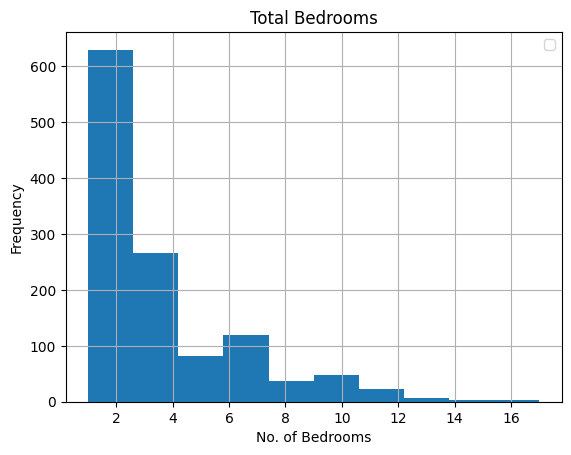

In [115]:
strat_test_data['total_bedrooms'].value_counts().hist()
plt.legend()
plt.xlabel('No. of Bedrooms')
plt.ylabel('Frequency')
plt.title('Total Bedrooms')
plt.show()

In [116]:
median = strat_test_data["total_bedrooms"].median()
median

442.0

In [117]:
strat_test_data["total_bedrooms"].fillna(median, inplace = True)

C:\Users\macready\AppData\Local\Temp\ipykernel_9464\2080259347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  strat_test_data["total_bedrooms"].fillna(median, inplace = True)
C:\Users\macready\AppData\Local\Temp\ipykernel_9464\2080259347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_data["total_bedrooms"].fillna(median, i

In [118]:
strat_test_data.loc[nullindex]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4600,-118.27,34.04,13,1784,442.0,2158,682,1.7038,118100,1.0,0.0,0.0,0.0,0.0
341,-122.17,37.75,38,992,442.0,732,259,1.6196,85100,0.0,0.0,0.0,1.0,0.0
15030,-117.02,32.78,31,2567,442.0,1198,499,3.4659,163000,1.0,0.0,0.0,0.0,0.0
9620,-120.40,37.30,28,1401,442.0,967,257,1.5917,89400,0.0,1.0,0.0,0.0,0.0
20484,-118.72,34.28,17,3051,442.0,1705,495,5.7376,218600,1.0,0.0,0.0,0.0,0.0
7097,-117.98,33.92,27,3700,442.0,1793,552,5.3668,219800,1.0,0.0,0.0,0.0,0.0
19402,-120.93,37.73,14,2799,442.0,2294,596,2.6343,81500,0.0,1.0,0.0,0.0,0.0
15060,-116.93,32.79,19,3354,442.0,1948,682,3.0192,142300,1.0,0.0,0.0,0.0,0.0
2420,-119.44,36.58,37,1054,442.0,879,257,2.5234,63500,0.0,1.0,0.0,0.0,0.0
3921,-118.56,34.20,35,2273,442.0,1431,403,4.0789,196700,1.0,0.0,0.0,0.0,0.0


# Step-3 Scaling

In [119]:
test_numeric = strat_test_data.iloc[:,0:8]

In [120]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(test_numeric)
standardized = standardizer.transform(test_numeric)

In [121]:
standardized

array([[-0.49244757, -0.42679997, -1.00004751, ...,  0.03042126,
        -0.1883331 ,  0.21797122],
       [ 1.28274656, -1.28931787,  0.73601386, ..., -0.44618283,
        -0.51014784, -0.04745526],
       [ 1.15199571, -1.27510054, -1.94699008, ...,  0.36963297,
         1.06875573,  0.03279363],
       ...,
       [ 0.79997421, -0.9007109 ,  0.10471882, ..., -0.52458188,
        -0.35929718, -0.24247322],
       [-1.20654832,  0.51154369, -0.68439999, ..., -0.36933624,
         0.01782947, -0.43938557],
       [ 0.71448328, -0.68271187,  1.44622079, ..., -0.79781419,
        -0.88224614, -0.37660726]])

In [122]:
standardized_data = pd.DataFrame(standardized , columns = strat_test_data.columns[:8] , index = strat_test_data.index)
standardized_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17428,-0.492448,-0.426800,-1.000048,-0.058195,-0.269271,0.030421,-0.188333,0.217971
15123,1.282747,-1.289318,0.736014,-0.423639,-0.519905,-0.446183,-0.510148,-0.047455
14508,1.151996,-1.275101,-1.946990,0.699842,1.236792,0.369633,1.068756,0.032794
12599,-1.005393,1.411974,1.051661,-0.524050,-0.601192,-0.679828,-0.593116,-0.253997
9001,0.578704,-0.739581,1.446221,-0.679622,-0.786345,-0.783842,-0.826934,-0.073082
...,...,...,...,...,...,...,...,...
16420,-0.904816,1.108671,-0.210929,-1.087298,-1.174715,0.073890,-1.199033,0.986782
12195,1.111765,-0.895972,-1.078959,0.814043,0.859712,0.827608,0.817338,-0.620090
10778,0.799974,-0.900711,0.104719,-0.452512,-0.393459,-0.524582,-0.359297,-0.242473
9836,-1.206548,0.511544,-0.684400,-0.366323,0.015233,-0.369336,0.017829,-0.439386


<Axes: ylabel='Density'>

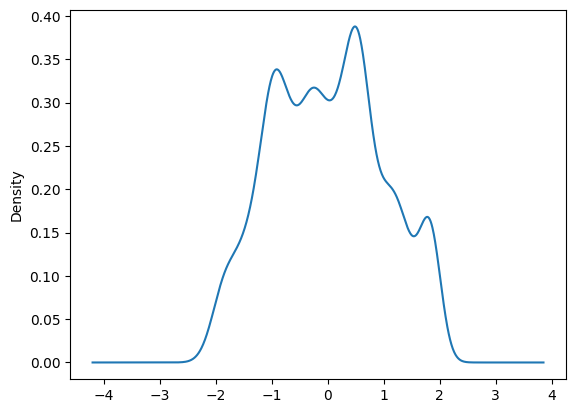

In [123]:
standardized_data['housing_median_age'].plot.kde()

In [124]:
standardized_data['housing_median_age'].min(), standardized_data['housing_median_age'].max()

(-2.1837257237087915, 1.8407801953780343)

In [125]:
standardized_data['housing_median_age'].mean()

2.1515950089634818e-17

In [126]:
standardized_data['housing_median_age'].std()

1.0001211460419976

In [127]:
strat_test_data[strat_test_data.columns[:8]] = standardized_data

C:\Users\macready\AppData\Local\Temp\ipykernel_9464\1306956442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_data[strat_test_data.columns[:8]] = standardized_data


In [128]:
strat_test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17428,-0.492448,-0.426800,-1.000048,-0.058195,-0.269271,0.030421,-0.188333,0.217971,150700,0.0,0.0,0.0,0.0,1.0
15123,1.282747,-1.289318,0.736014,-0.423639,-0.519905,-0.446183,-0.510148,-0.047455,147800,1.0,0.0,0.0,0.0,0.0
14508,1.151996,-1.275101,-1.946990,0.699842,1.236792,0.369633,1.068756,0.032794,267000,0.0,0.0,0.0,0.0,1.0
12599,-1.005393,1.411974,1.051661,-0.524050,-0.601192,-0.679828,-0.593116,-0.253997,124200,0.0,1.0,0.0,0.0,0.0
9001,0.578704,-0.739581,1.446221,-0.679622,-0.786345,-0.783842,-0.826934,-0.073082,179400,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,-0.904816,1.108671,-0.210929,-1.087298,-1.174715,0.073890,-1.199033,0.986782,162500,0.0,1.0,0.0,0.0,0.0
12195,1.111765,-0.895972,-1.078959,0.814043,0.859712,0.827608,0.817338,-0.620090,163600,1.0,0.0,0.0,0.0,0.0
10778,0.799974,-0.900711,0.104719,-0.452512,-0.393459,-0.524582,-0.359297,-0.242473,284100,1.0,0.0,0.0,0.0,0.0
9836,-1.206548,0.511544,-0.684400,-0.366323,0.015233,-0.369336,0.017829,-0.439386,217300,1.0,0.0,0.0,0.0,0.0


In [129]:
strat_test_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [130]:
strat_test_data[strat_test_data.columns[:8]] = standardized_data

C:\Users\macready\AppData\Local\Temp\ipykernel_9464\1306956442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_test_data[strat_test_data.columns[:8]] = standardized_data


In [131]:
 strat_test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17428,-0.492448,-0.426800,-1.000048,-0.058195,-0.269271,0.030421,-0.188333,0.217971,150700,0.0,0.0,0.0,0.0,1.0
15123,1.282747,-1.289318,0.736014,-0.423639,-0.519905,-0.446183,-0.510148,-0.047455,147800,1.0,0.0,0.0,0.0,0.0
14508,1.151996,-1.275101,-1.946990,0.699842,1.236792,0.369633,1.068756,0.032794,267000,0.0,0.0,0.0,0.0,1.0
12599,-1.005393,1.411974,1.051661,-0.524050,-0.601192,-0.679828,-0.593116,-0.253997,124200,0.0,1.0,0.0,0.0,0.0
9001,0.578704,-0.739581,1.446221,-0.679622,-0.786345,-0.783842,-0.826934,-0.073082,179400,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,-0.904816,1.108671,-0.210929,-1.087298,-1.174715,0.073890,-1.199033,0.986782,162500,0.0,1.0,0.0,0.0,0.0
12195,1.111765,-0.895972,-1.078959,0.814043,0.859712,0.827608,0.817338,-0.620090,163600,1.0,0.0,0.0,0.0,0.0
10778,0.799974,-0.900711,0.104719,-0.452512,-0.393459,-0.524582,-0.359297,-0.242473,284100,1.0,0.0,0.0,0.0,0.0
9836,-1.206548,0.511544,-0.684400,-0.366323,0.015233,-0.369336,0.017829,-0.439386,217300,1.0,0.0,0.0,0.0,0.0


# Step-4 Preparing X_test and Y_test

In [132]:
x_test = strat_test_data.drop("median_house_value",axis=1)
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17428,-0.492448,-0.426800,-1.000048,-0.058195,-0.269271,0.030421,-0.188333,0.217971,0.0,0.0,0.0,0.0,1.0
15123,1.282747,-1.289318,0.736014,-0.423639,-0.519905,-0.446183,-0.510148,-0.047455,1.0,0.0,0.0,0.0,0.0
14508,1.151996,-1.275101,-1.946990,0.699842,1.236792,0.369633,1.068756,0.032794,0.0,0.0,0.0,0.0,1.0
12599,-1.005393,1.411974,1.051661,-0.524050,-0.601192,-0.679828,-0.593116,-0.253997,0.0,1.0,0.0,0.0,0.0
9001,0.578704,-0.739581,1.446221,-0.679622,-0.786345,-0.783842,-0.826934,-0.073082,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,-0.904816,1.108671,-0.210929,-1.087298,-1.174715,0.073890,-1.199033,0.986782,0.0,1.0,0.0,0.0,0.0
12195,1.111765,-0.895972,-1.078959,0.814043,0.859712,0.827608,0.817338,-0.620090,1.0,0.0,0.0,0.0,0.0
10778,0.799974,-0.900711,0.104719,-0.452512,-0.393459,-0.524582,-0.359297,-0.242473,1.0,0.0,0.0,0.0,0.0
9836,-1.206548,0.511544,-0.684400,-0.366323,0.015233,-0.369336,0.017829,-0.439386,1.0,0.0,0.0,0.0,0.0


In [133]:
y_test = strat_test_data["median_house_value"]
y_test

17428    150700
15123    147800
14508    267000
12599    124200
9001     179400
          ...  
16420    162500
12195    163600
10778    284100
9836     217300
6748     225000
Name: median_house_value, Length: 4128, dtype: int64

# Step-5 Making Predictions

In [134]:
# Making Predictions Using Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_test, y_test)

y_pred = lin_reg.predict(x_test)
y_pred

array([263344.14583153, 218860.81780546, 250354.44141681, ...,
       211945.00936891, 232657.70265051, 202452.04391086])

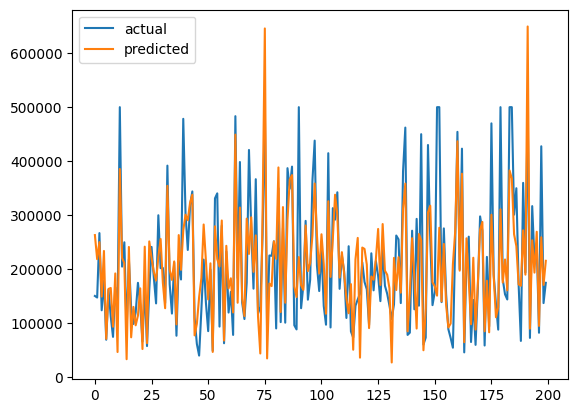

In [136]:
plt.plot(np.array(y_test)[:200], label='actual')
plt.plot(y_pred[:200], label = 'predicted')
plt.legend()
plt.show()

In [137]:
# Calculating Mean Squared Error

In [138]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(y_test, y_pred, squared=False)
lin_rmse

C:\Users\macready\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


68404.83081210908

In [139]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

49603.06563011675

In [140]:
# Making Predictions Using Decision Tree

In [141]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_test, y_test)

y_pred_2 = tree_reg.predict(x_test)
y_pred_2

array([150700., 147800., 267000., ..., 284100., 217300., 225000.])

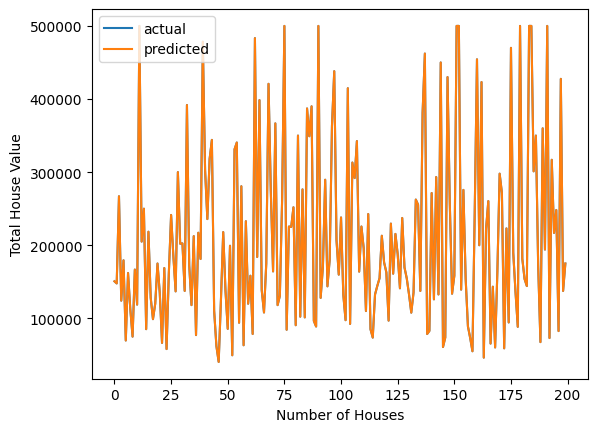

In [142]:
plt.plot(np.array(y_test)[:200], label='actual')
plt.plot(y_pred_2[:200], label = 'predicted')
plt.legend()
plt.xlabel('Number of Houses')
plt.ylabel('Total House Value')
plt.show()

In [143]:
# Caluculating Mean Squared Error

In [144]:
from sklearn.metrics import mean_squared_error

tree_rmse = mean_squared_error(y_test, y_pred_2, squared = False)
tree_rmse

C:\Users\macready\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

In [145]:
# Cross Validation Using Decision Tree

In [146]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_test, y_test,
                         scoring="neg_mean_squared_error", cv=10)

scores

tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([86661.89220661, 66574.25983208, 68111.70243258, 66913.18495369,
       73263.52800428, 73705.88884488, 77892.33031921, 76783.58409817,
       73570.66191893, 83280.12711551])

In [147]:
def display_scores(rmse_scores):

    print("RMSE Scores:", rmse_scores, "\n")
    print("RMSE Scores Mean:", rmse_scores.mean(), "\n")
    print("RMSE Scores Standard deviation:", rmse_scores.std(), "\n")

display_scores(tree_rmse_scores)

RMSE Scores: [86661.89220661 66574.25983208 68111.70243258 66913.18495369
 73263.52800428 73705.88884488 77892.33031921 76783.58409817
 73570.66191893 83280.12711551] 

RMSE Scores Mean: 74675.71597259454 

RMSE Scores Standard deviation: 6368.883456821789 



In [148]:
# Cross Validation Using Linear Regression

In [149]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, x_test, y_test,
                         scoring="neg_mean_squared_error", cv=10)

scores
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

display_scores(lin_reg_rmse_scores)

RMSE Scores: [76123.95092496 64796.96131852 64772.89489536 78247.12308
 67284.55878634 61198.96722878 72007.03653468 67386.9378522
 67643.47957867 72966.2264111 ] 

RMSE Scores Mean: 69242.81366106147 

RMSE Scores Standard deviation: 5140.219038989153 



In [150]:
# Making Predictions Using Random Forest

In [151]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, max_features = 10, random_state=42)
forest_reg.fit(x_test, y_test)

y_pred_3 = forest_reg.predict(x_test)
y_pred_3

array([165959.  , 156057.  , 245357.01, ..., 259184.01, 225553.02,
       213840.  ])

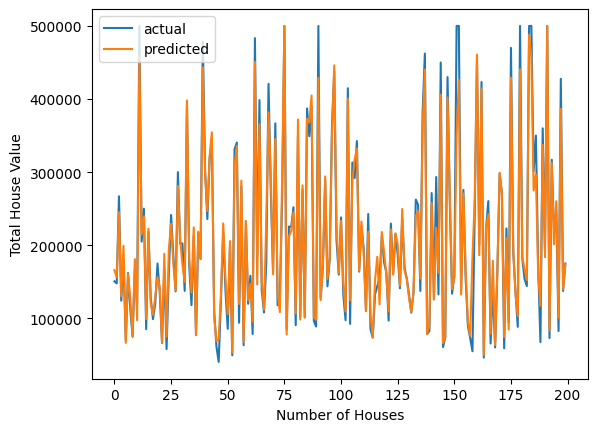

In [152]:
plt.plot(np.array(y_test)[:200], label='actual')
plt.plot(y_pred_3[:200], label = 'predicted')
plt.legend()
plt.xlabel('Number of Houses')
plt.ylabel('Total House Value')
plt.show()

In [153]:
# Cross Validation Using Random Forest

In [154]:
forest_scores = cross_val_score(forest_reg, x_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([61268.75716527, 49248.16831634, 50608.93833851, 50591.67514519,
       52815.50182892, 47010.1220503 , 58354.38322524, 58260.51776717,
       52212.666754  , 61656.56225047])

In [155]:
display_scores(forest_rmse_scores)

RMSE Scores: [61268.75716527 49248.16831634 50608.93833851 50591.67514519
 52815.50182892 47010.1220503  58354.38322524 58260.51776717
 52212.666754   61656.56225047] 

RMSE Scores Mean: 54202.72928413985 

RMSE Scores Standard deviation: 4973.040530420675 



In [156]:
# Cross Validation Using Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': list(range(1,101)),
          'max_features': list(range(1,9))}

forest_reg = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_reg, params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(x_test, y_test)

rnd_search.cv_results_

In [ ]:
randomSearch_results = rnd_search.cv_results_
result_df = pd.DataFrame(randomSearch_results)
result_df

In [ ]:
result_df[['params', 'mean_test_score']]

In [ ]:
result_df['mean_test_score'].argmax()

In [ ]:
result_df['params'][result_df['mean_test_score'].argmax()]

In [ ]:
imp_feature = rnd_search.best_estimator_.feature_importances_
imp_feature

In [ ]:
fmodel = rnd_search.best_estimator_
fmodel

In [ ]:
import joblib
joblib.dump(fmodel, "fmodel.pkl")

In [ ]:
fmodel = joblib.load("fmodel.pkl")
fmodel